# Subir archivos de datos a Google Colab

Por ejemplo datos de manchas solares tomados de https://www.sidc.be/SILSO/home

In [44]:
from google.colab import files
uploaded = files.upload()

Saving SN_m_tot_V2.00.txt to SN_m_tot_V2.00.txt


# Listar los archivos subidos

In [19]:
!ls

 datos_manchas1.txt	  sample_data		     'SN_m_tot_V2.0new (2).txt'   SN_m_tot_V2.txt
'datos_manchas (1).txt'  'SN_m_tot_V2.0 (2).txt'      SN_m_tot_V2.0new.txt
 datos_manchas.txt	 'SN_m_tot_V2.0new (1).txt'  'SN_m_tot_V2 (1).txt'


In [45]:
! more SN_m_tot_V2.0.txt

1749 01 1749.042   96.7  -1.0    -1  
1749 02 1749.123  104.3  -1.0    -1  
1749 03 1749.204  116.7  -1.0    -1  
1749 04 1749.288   92.8  -1.0    -1  
1749 05 1749.371  141.7  -1.0    -1  
1749 06 1749.455  139.2  -1.0    -1  
1749 07 1749.538  158.0  -1.0    -1  
1749 08 1749.623  110.5  -1.0    -1  
1749 09 1749.707  126.5  -1.0    -1  
1749 10 1749.790  125.8  -1.0    -1  
1749 11 1749.874  264.3  -1.0    -1  
1749 12 1749.958  142.0  -1.0    -1  
1750 01 1750.042  122.2  -1.0    -1  
1750 02 1750.123  126.5  -1.0    -1  
1750 03 1750.204  148.7  -1.0    -1  
1750 04 1750.288  147.2  -1.0    -1  
1750 05 1750.371  150.0  -1.0    -1  
1750 06 1750.455  166.7  -1.0    -1  
1750 07 1750.538  142.3  -1.0    -1  
1750 08 1750.623  171.7  -1.0    -1  
1750 09 1750.707  152.0  -1.0    -1  
1750 10 1750.790  109.5  -1.0    -1  
1750 11 1750.874  105.5  -1.0    -1  


# Otra opción es poner los archivos de datos en google drive y montar google drive en google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls ./drive/MyDrive

# Imprimir el inicio o final de alguno de los archivos

In [114]:
import pandas as pd
#df = pd.read_csv('SN_m_tot_V2.00.txt',header=0)
#df=pd.read_csv("SN_m_tot_V2.00.txt", header=None)
df = pd.read_fwf("SN_m_tot_V2.00.txt",header=None,)
df.head(10)


,0,1,2,3,4,5
0,1749,1,1749.042,96.7,-1.0,-1
1,1749,2,1749.123,104.3,-1.0,-1
2,1749,3,1749.204,116.7,-1.0,-1
3,1749,4,1749.288,92.8,-1.0,-1
4,1749,5,1749.371,141.7,-1.0,-1
5,1749,6,1749.455,139.2,-1.0,-1
6,1749,7,1749.538,158.0,-1.0,-1
7,1749,8,1749.623,110.5,-1.0,-1
8,1749,9,1749.707,126.5,-1.0,-1
9,1749,10,1749.790,125.8,-1.0,-1


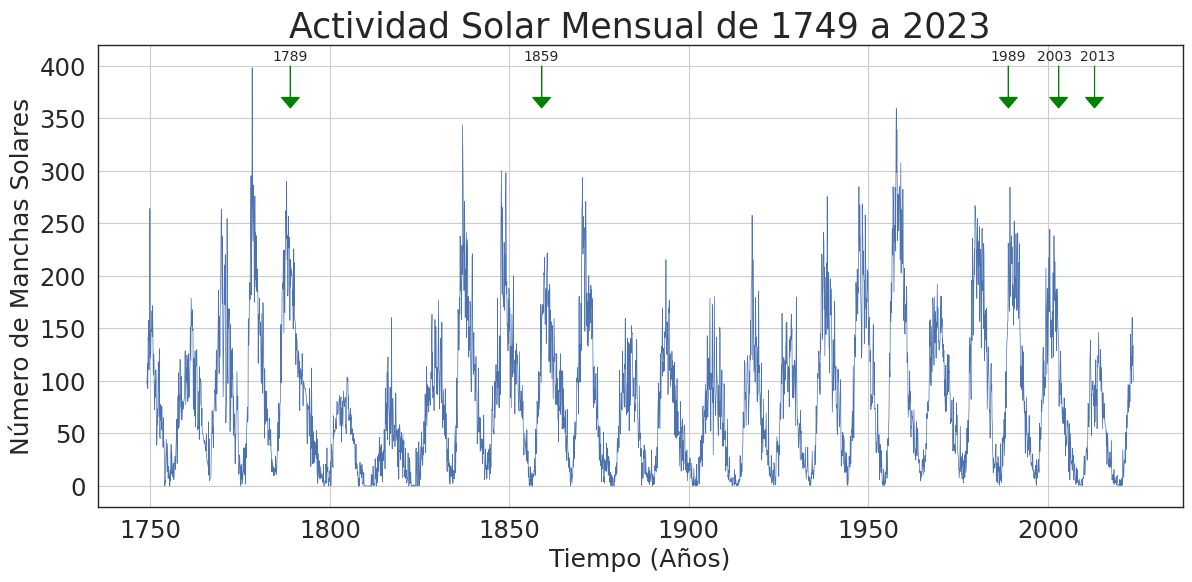

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df.iloc[:, 2],df.iloc[:, 3],'-b',linewidth=.5)
plt.xlabel("Tiempo (Años)", fontsize=18)
plt.ylabel("Número de Manchas Solares", fontsize=18)
plt.title("Actividad Solar Mensual de 1749 a 2023", fontsize=25)
plt.grid()
plt.arrow(1789, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('1789', xy = (1789-5, 400+5), fontsize=10)
plt.arrow(1859, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('1859', xy = (1859-5, 400+5), fontsize=10)
plt.arrow(1989, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('1989', xy = (1989-5, 400+5), fontsize=10)
plt.arrow(2003, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('2003', xy = (2003-6, 400+5), fontsize=10)
plt.arrow(2013, 400, 0, -30, head_width=5, head_length=10, color='green')
plt.annotate('2013', xy = (2013-4, 400+5), fontsize=10)
plt.show()

In [119]:
import numpy as np               # Array manipulation
import pandas as pd              # Data Manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns
# Define a function called timeseries_plot
def timeseries_plot(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x, y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)         # Statistical plotting

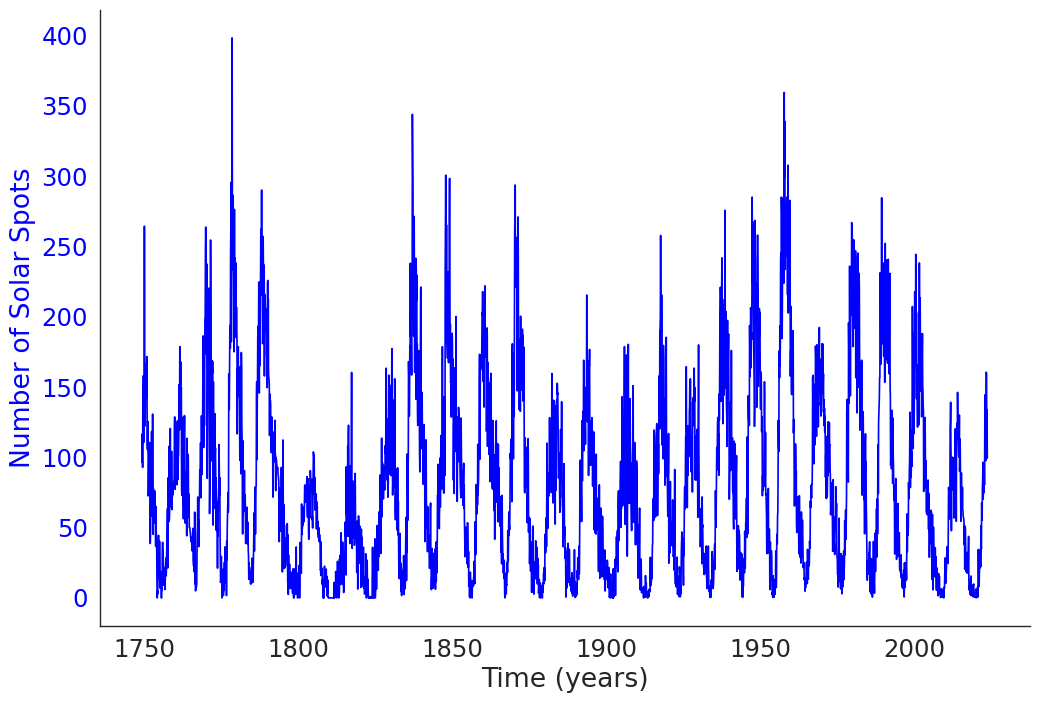

In [121]:
# Define style
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

# setting figure and axis objects
fig, ax = plt.subplots(figsize = (12, 8))

# Plotting sales values
timeseries_plot(ax, df.iloc[:, 2],df.iloc[:, 3], "blue", "Time (years)", "Number of Solar Spots")

sns.despine(right = True)
plt.show()

# Graficar el canal A y canal B

In [124]:
import plotly.express as px
import numpy as np

fig = px.scatter(title='Solar Activity',width=800, height=600)
fig.add_scatter(x=df.iloc[:, 2], y=df.iloc[:, 3],name='Canal A',mode='lines+markers',marker=dict(
            color='Green',
            symbol='circle',
            size=4,
            ) )


fig.update_layout(xaxis_title="Time (years)",yaxis_title="Number of Solar Spots")

fig.show()


# Plot data from a Tektronix Oscilloscope

In [ ]:
!pip install pyvisa-py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
import time # std module
import pyvisa
#import matplotlib.pyplot as plt # http://matplotlib.org/
import numpy as np # http://www.numpy.org/
rm = pyvisa.ResourceManager()

scope = rm.open_resource('TCPIP::148.228.103.52::80::SOCKET')
scope.write('*IDN?')
print(scope.read())

Exception: ignored